# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

The data set I chose is very big (that's why I chose it!) and contains data around a lot of job postings.  I remember being skeptical when I first had this set about its validity.  Let's check it out!

Who: This data set would be useful to people researching hiring trends, or those interested in exploring advantages or disadvantages of careers.  It could be useful to those looking to those developing NLP programs, as there are description parameters.  

What: This data might tell a story of inequality: maybe certain fields, areas of the world, or industries have more of an effect on salary range than they should.  It's possible this data is making a case for the need for more engineers, or environmental scientists, or any other field over-represented or under-represented in the data.  There are a lot of possibilties, that I'll have to dive in the data to see what point is might be made!

How: Charts showing the salary range by location, or field would illstrate a point.  This data could show that you should use a specific job portal as the salary ranges are higher for the same positions!  Illustrating that relationship would make the point very clearly.  


# 3. Homework - work with your own data

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [4]:
jobs = pd.read_csv("job_descriptions 2.csv")#This is a big data set, so it should take ~10s



In [8]:
jobs.head()


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [7]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

Maybe it's good to convert the posting date into a datetime object like in week 1:

In [11]:

try:
    jobs["Job Posting Date"] = pd.to_datetime(jobs["Job Posting Date"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")
print(jobs.info())

It worked!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Job Id            1615940 non-null  int64         
 1   Experience        1615940 non-null  object        
 2   Qualifications    1615940 non-null  object        
 3   Salary Range      1615940 non-null  object        
 4   location          1615940 non-null  object        
 5   Country           1615940 non-null  object        
 6   latitude          1615940 non-null  float64       
 7   longitude         1615940 non-null  float64       
 8   Work Type         1615940 non-null  object        
 9   Company Size      1615940 non-null  int64         
 10  Job Posting Date  1615940 non-null  datetime64[ns]
 11  Preference        1615940 non-null  object        
 12  Contact Person    1615940 non-null  object        
 13  Contact           1615940 non-n

It looks like all the dates were formatted similarly, saving a lot of headache!  Next, let's look for null values

In [15]:
jobs.isnull().values.any()
jobs.isnull().sum()



Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

Okay, so it looks like there are a lot of null values, but they are in the 'Company Profile' parameter. This parameter isn't one we'll be using to do a lot of measurements, so it's probably ok.  I don't think we need to take out these rows, or even replace them until we're doing complex enough analyses to include the descriptions of the companies.

Next, let's look for duplicates.  First, we'll look for total duplicate rows.  Then, we'll look for duplicates by column.

In [17]:
jobs.duplicated().any()

np.False_

In [21]:
print(jobs['Job Id'].is_unique)
for i in jobs:
    print(f"{i} is totally unique: ", jobs[i].is_unique)

True
Job Id is totally unique:  True
Experience is totally unique:  False
Qualifications is totally unique:  False
Salary Range is totally unique:  False
location is totally unique:  False
Country is totally unique:  False
latitude is totally unique:  False
longitude is totally unique:  False
Work Type is totally unique:  False
Company Size is totally unique:  False
Job Posting Date is totally unique:  False
Preference is totally unique:  False
Contact Person is totally unique:  False
Contact is totally unique:  False
Job Title is totally unique:  False
Role is totally unique:  False
Job Portal is totally unique:  False
Job Description is totally unique:  False
Benefits is totally unique:  False
skills is totally unique:  False
Responsibilities is totally unique:  False
Company is totally unique:  False
Company Profile is totally unique:  False


So the Job Id's are unique, that's nice.  There are a lot of repeats in the other columns.  Some of these make sense: jobs could be posted on the same date, jobs could have the titles.  It is weird to have job descriptions be exactly the same, especially since we already saw that there were no null values.  

Now, lets double check for duplicates AFTER we remove the Job ID.  A good data set should not have many duplicates after we remove the Job ID, as having all other parameters the same wouldn't make any sense (except for maybe multiple hires?).  It still shouldn't be a lot.  

In [25]:
jobs_noid = jobs.drop(columns=['Job Id'])
#print(jobs_noid.head()) #uncomment this line to make sure it worked
print(jobs_noid.duplicated().any())


False


Well great!  No duplicates, though maybe some limited varieties in the columns.  As a last step, I'll do some sanity check to make sure the values make sense:  The dates posted aren't super old or in the future, the company size makes sense, etc.  

In [28]:
print("Minimum company size: ",jobs['Company Size'].min())
print("Maximum company size: ", jobs['Company Size'].max())

print("Earliest posting: ", jobs['Job Posting Date'].min())
print("Latest posting: ", jobs['Job Posting Date'].max())

Minimum company size:  12646
Maximum company size:  134834
Earliest posting:  2021-09-15 00:00:00
Latest posting:  2023-09-15 00:00:00


These make sense!  Once we get a little more complicated, using Groupby objects to see the breakdown by variable might be helpful in determining the validity of this data. So far, it does look usable however! 

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

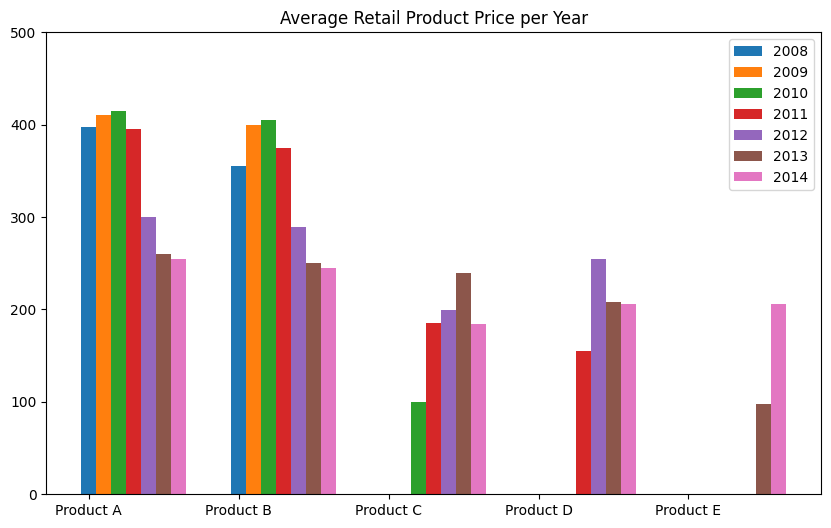

In [44]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
product_a = [398, 410, 415, 395, 300, 260, 255]
product_b = [355, 400, 405 ,375, 289, 250, 245]
product_c = [0,0, 100, 185, 199, 240,184]
product_d = [0,0,0,155,255,208,206]
product_e = [0,0,0,0,0,98,206]
products = {"Product A":product_a,"Product B":product_b, "Product C": product_c, "Product D":product_d, "Product E":product_e}


index = np.arange(len(products)) 
fig, ax = plt.subplots(figsize=(10, 6))


bar_width = .1
for i, year in enumerate(years):
    prices = [products[product][i] for product in products]
    ax.bar(index + i * bar_width, prices, bar_width, label=str(year))



ax.set_title('Average Retail Product Price per Year')
ax.set_xticks(index)
ax.set_xticklabels(products.keys())
ax.legend()
plt.ylim(0, 500)



plt.show()